# Project 4 - Fraud Detection Etherium - Pycaret

- Modelling Fraud Detection Etherium with **Pycaret**

- Course Name :         Applied Machine Learning
- Course instructor:    Sohail Tehranipour
- Student Name :        Afshin Masoudi Ashtiani
- Project 4 -           Fraud Detection Etherium
- Date :                September 2024
- File(ipynb) :         2/3

## Step 1 : Install required libraries

In [ ]:
# install full version
!pip install wandb joblib
!pip install pycaret[full] autoviz

## Step 2 : Import required libraries

In [ ]:
import pandas as pd
import wandb

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Step 3 : Load and Prepare data

- Load the dataset

In [ ]:
# Load the dataset
dataset_path = '/content/drive/My Drive/Applied Machine Learning/Project 4 : Fraud Detection Etherium/datasets/cleaned_transaction_dataset.csv'
# dataset_path = r'C:\Users\Afshin\Desktop\10_Projects\Project_4_Fraud_Detection_Etherium\datasets\cleaned_transaction_dataset.csv'

df = pd.read_csv(dataset_path)
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9288 entries, 0 to 9287
Data columns (total 17 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   FLAG                                           9288 non-null   int64  
 1   Avg min between sent tnx                       9288 non-null   float64
 2   Avg min between received tnx                   9288 non-null   float64
 3   Time difference between first and last (mins)  9288 non-null   float64
 4   Sent tnx                                       9288 non-null   int64  
 5   Received tnx                                   9288 non-null   int64  
 6   Number of created contracts                    9288 non-null   int64  
 7   Max value received                             9288 non-null   float64
 8   Avg value received                             9288 non-null   float64
 9   Avg value sent                                 9288 

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time difference between first and last (mins),Sent tnx,Received tnx,Number of created contracts,Max value received,Avg value received,Avg value sent,Total either sent,Total either balance,ERC20 total either received,ERC20 total either sent,ERC20 total either sent contract,ERC20 unique sent address,ERC20 unique received token name
0,0,844.26,1093.71,704785.63,721,89,0,45.806785,6.589513,1.200681,865.691093,-279.224419,3.558854e+07,3.560317e+07,0.0,30.0,57.0
1,0,12709.07,2958.44,1218216.73,94,8,0,2.613269,0.385685,0.032844,3.087297,-0.001819,4.034283e+02,2.260809e+00,0.0,1.0,7.0
2,0,246194.54,2434.02,516729.30,2,10,0,1.165453,0.358906,1.794308,3.588616,0.000441,5.215121e+02,0.000000e+00,0.0,0.0,8.0
3,0,10219.60,15785.09,397555.90,25,9,0,500.000000,99.488840,70.001834,1750.045862,-854.646303,1.711105e+04,1.141223e+04,0.0,2.0,11.0
4,0,36.61,10707.77,382472.42,4598,20,1,12.802411,2.671095,0.022688,104.318883,-50.896986,1.628297e+05,1.235399e+05,0.0,4.0,27.0


In [ ]:
X = df.drop(['FLAG'], axis= 1)
y = df.FLAG

## Step 4 : Set Up the PyCaret Environment
Initialize in PyCaret

- extract the columns with object, number, bool datatypes

In [ ]:
# Identify feature types
numeric_features = X.select_dtypes(include=['number']).columns.tolist()
print(f'> Numeric Features is {numeric_features}')

> Numeric Features is ['Avg min between sent tnx', 'Avg min between received tnx', 'Time difference between first and last (mins)', 'Sent tnx', 'Received tnx', 'Number of created contracts', 'Max value received', 'Avg value received', 'Avg value sent', 'Total either sent', 'Total either balance', 'ERC20 total either received', 'ERC20 total either sent', 'ERC20 total either sent contract', 'ERC20 unique sent address', 'ERC20 unique received token name']


In [ ]:
# init setup
import pycaret
from pycaret.classification import *

# Set up the classification problem in PyCaret
# Note: specify the column names according to your actual dataset
classification_setup = setup(
    data= df,
    target= 'FLAG',
    train_size= 0.8,
    fix_imbalance=True,
    normalize= True,  # Enable normalization
    numeric_features= numeric_features,
    log_experiment= 'wandb',
    experiment_name= 'Fraud_Detection_Etherium_WandB',
    session_id=123)

,Description,Value
0,Session id,123
1,Target,FLAG
2,Target type,Binary
3,Original data shape,"(9288, 17)"
4,Transformed data shape,"(14068, 17)"
5,Transformed train set shape,"(12210, 17)"
6,Transformed test set shape,"(1858, 17)"
7,Numeric features,16
8,Preprocess,True
9,Imputation type,simple


wandb: Currently logged in as: afshin-education (afshin-education-personalitydatabase). Use `wandb login --relogin` to force relogin


## Step 5 : Train
Training in PyCaret

In [ ]:
# compare baseline models
top3_models = compare_models(n_select= 3, sort='Prec.')
top3_models

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9759,0.9956,0.9411,0.9256,0.9331,0.9184,0.9186,0.9890
xgboost,Extreme Gradient Boosting,0.9734,0.9942,0.9283,0.9228,0.9254,0.9092,0.9093,4.0310
catboost,CatBoost Classifier,0.9732,0.9946,0.9328,0.9184,0.9255,0.9092,0.9092,13.0010
rf,Random Forest Classifier,0.9688,0.9925,0.9117,0.9131,0.9123,0.8933,0.8934,2.7020
et,Extra Trees Classifier,0.9641,0.9889,0.8868,0.9096,0.8980,0.8762,0.8763,1.7370
gbc,Gradient Boosting Classifier,0.9564,0.9912,0.9389,0.8373,0.8850,0.8582,0.8605,3.9560
dt,Decision Tree Classifier,0.9471,0.9235,0.8869,0.8297,0.8570,0.8246,0.8256,0.1870
ada,Ada Boost Classifier,0.9409,0.9824,0.9343,0.7795,0.8496,0.8133,0.8187,0.8060
knn,K Neighbors Classifier,0.9090,0.9472,0.8898,0.6919,0.7778,0.7218,0.7313,0.2140
lr,Logistic Regression,0.5864,0.8033,0.8256,0.2781,0.4160,0.2035,0.2763,0.9740


Processing:   0%|          | 0/71 [00:00<?, ?it/s]

[LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
                subsample_for_bin=200000, subsample_freq=0),
 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='',
               learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
               max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
               missing=nan, monotone_co

## Step 6 : Optimize
Optimization in PyCaret

- Tune **models**

In [ ]:
# tune model
tuned_top3_models = [tune_model(model, choose_better= True) for model in top3_models]
tuned_top3_models

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9785,0.9953,0.9242,0.9531,0.9385,0.9254,0.9256
1,0.9758,0.9966,0.9015,0.9597,0.9297,0.9151,0.9157
2,0.9704,0.9955,0.9242,0.9104,0.9173,0.8993,0.8993
3,0.9812,0.9955,0.9545,0.9403,0.9474,0.9359,0.9359
4,0.9785,0.9956,0.9470,0.9328,0.9398,0.9267,0.9268
5,0.9690,0.9953,0.9023,0.9231,0.9125,0.8937,0.8938
6,0.9731,0.9948,0.9398,0.9124,0.9259,0.9095,0.9096
7,0.9812,0.9963,0.9549,0.9407,0.9478,0.9363,0.9363
8,0.9865,0.9974,0.9850,0.9424,0.9632,0.9550,0.9554


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9664,0.9955,0.9697,0.8591,0.9110,0.8904,0.8929
1,0.9677,0.9944,0.9470,0.8803,0.9124,0.8926,0.8935
2,0.9583,0.9937,0.9470,0.8389,0.8897,0.8641,0.8665
3,0.9664,0.9951,0.9697,0.8591,0.9110,0.8904,0.8929
4,0.9731,0.9947,0.9621,0.8944,0.9270,0.9105,0.9114
5,0.9690,0.9936,0.9474,0.8873,0.9164,0.8974,0.8981
6,0.9637,0.9938,0.9474,0.8630,0.9032,0.8809,0.8824
7,0.9744,0.9943,0.9699,0.8958,0.9314,0.9157,0.9168
8,0.9771,0.9966,0.9925,0.8919,0.9395,0.9254,0.9275


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9610,0.9922,0.9318,0.8601,0.8945,0.8706,0.8717
1,0.9677,0.9936,0.9242,0.8971,0.9104,0.8907,0.8909
2,0.9610,0.9922,0.9015,0.8815,0.8914,0.8676,0.8677
3,0.9785,0.9956,0.9545,0.9265,0.9403,0.9272,0.9273
4,0.9731,0.9952,0.9470,0.9058,0.9259,0.9095,0.9098
5,0.9623,0.9932,0.8947,0.8947,0.8947,0.8718,0.8718
6,0.9623,0.9906,0.9323,0.8671,0.8986,0.8754,0.8763
7,0.9704,0.9939,0.9549,0.8881,0.9203,0.9021,0.9030
8,0.9812,0.9966,0.9925,0.9103,0.9496,0.9381,0.9394


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


[LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
                subsample_for_bin=200000, subsample_freq=0),
 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='',
               learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
               max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
               missing=nan, monotone_co

- **Ensemble model**


In [ ]:
# ensemble model
bagged_top3_models = [ensemble_model(model, choose_better= True) for model in top3_models]
bagged_top3_models

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9758,0.9964,0.9242,0.9385,0.9313,0.9166,0.9166
1,0.9717,0.9955,0.9015,0.9370,0.9189,0.9018,0.9021
2,0.9704,0.9958,0.9470,0.8929,0.9191,0.9010,0.9016
3,0.9812,0.9954,0.9621,0.9338,0.9478,0.9363,0.9364
4,0.9838,0.9967,0.9621,0.9478,0.9549,0.9451,0.9451
5,0.9744,0.9953,0.9248,0.9318,0.9283,0.9127,0.9128
6,0.9717,0.9945,0.9323,0.9118,0.9219,0.9047,0.9048
7,0.9785,0.9969,0.9549,0.9270,0.9407,0.9276,0.9277
8,0.9865,0.9977,0.9850,0.9424,0.9632,0.9550,0.9554


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

Original model was better than the ensembled model, hence it will be returned. NOTE: The display metrics are for the ensembled model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9731,0.9958,0.9167,0.9308,0.9237,0.9073,0.9074
1,0.9677,0.9945,0.9091,0.9091,0.9091,0.8895,0.8895
2,0.9623,0.9927,0.9091,0.8824,0.8955,0.8725,0.8727
3,0.9798,0.9957,0.9545,0.9333,0.9438,0.9315,0.9316
4,0.9798,0.9952,0.9470,0.9398,0.9434,0.9311,0.9311
5,0.9771,0.9950,0.9248,0.9462,0.9354,0.9215,0.9216
6,0.9717,0.9937,0.9248,0.9179,0.9213,0.9041,0.9041
7,0.9771,0.9956,0.9474,0.9265,0.9368,0.9228,0.9229
8,0.9852,0.9969,0.9774,0.9420,0.9594,0.9504,0.9506


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

Original model was better than the ensembled model, hence it will be returned. NOTE: The display metrics are for the ensembled model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9744,0.9949,0.9394,0.9185,0.9288,0.9133,0.9133
1,0.9690,0.9944,0.9167,0.9098,0.9132,0.8944,0.8944
2,0.9650,0.9928,0.9091,0.8955,0.9023,0.8809,0.8810
3,0.9825,0.9964,0.9621,0.9407,0.9513,0.9406,0.9407
4,0.9812,0.9964,0.9545,0.9403,0.9474,0.9359,0.9359
5,0.9744,0.9942,0.9323,0.9254,0.9288,0.9133,0.9133
6,0.9664,0.9943,0.9173,0.8971,0.9071,0.8865,0.8866
7,0.9771,0.9947,0.9474,0.9265,0.9368,0.9228,0.9229
8,0.9812,0.9968,0.9850,0.9161,0.9493,0.9377,0.9387


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

Original model was better than the ensembled model, hence it will be returned. NOTE: The display metrics are for the ensembled model (not the original one).


[LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
                subsample_for_bin=200000, subsample_freq=0),
 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='',
               learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
               max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
               missing=nan, monotone_co

In [ ]:
# ensemble model
boosted_top3_models = [ensemble_model(model, method= 'Boosting', choose_better= True) for model in top3_models]
boosted_top3_models

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9771,0.9974,0.9242,0.9457,0.9349,0.9210,0.9211
1,0.9798,0.9968,0.9091,0.9756,0.9412,0.9290,0.9299
2,0.9744,0.9966,0.9394,0.9185,0.9288,0.9133,0.9133
3,0.9865,0.9970,0.9697,0.9552,0.9624,0.9542,0.9542
4,0.9852,0.9970,0.9621,0.9549,0.9585,0.9495,0.9495
5,0.9744,0.9961,0.9173,0.9385,0.9278,0.9122,0.9123
6,0.9731,0.9948,0.9398,0.9124,0.9259,0.9095,0.9096
7,0.9798,0.9965,0.9398,0.9470,0.9434,0.9311,0.9311
8,0.9865,0.9976,0.9850,0.9424,0.9632,0.9550,0.9554


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8223,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.8223,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.8223,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.8223,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.8223,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.8210,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.8210,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.8210,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.8210,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

Original model was better than the ensembled model, hence it will be returned. NOTE: The display metrics are for the ensembled model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9744,0.9949,0.9318,0.9248,0.9283,0.9127,0.9128
1,0.9690,0.9949,0.9015,0.9225,0.9119,0.8931,0.8932
2,0.9623,0.9941,0.9015,0.8881,0.8947,0.8718,0.8718
3,0.9852,0.9964,0.9621,0.9549,0.9585,0.9495,0.9495
4,0.9798,0.9968,0.9545,0.9333,0.9438,0.9315,0.9316
5,0.9771,0.9938,0.9173,0.9531,0.9349,0.9210,0.9212
6,0.9690,0.9948,0.9173,0.9104,0.9139,0.8950,0.8950
7,0.9771,0.9942,0.9474,0.9265,0.9368,0.9228,0.9229
8,0.9825,0.9968,0.9850,0.9225,0.9527,0.9420,0.9428


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

[AdaBoostClassifier(algorithm='SAMME.R',
                    estimator=LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             num_leaves=31, objective=None,
                                             random_state=123, reg_alpha=0.0,
                                             reg_lambda=0.0, subsample=1.0,
                                             subsample_for_bin=200000,
                                     

- **Blend models**

In [ ]:
# blend models
blender_top3_models = blend_models(tuned_top3_models, choose_better= True)
blender_top3_models

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9744,0.9962,0.9318,0.9248,0.9283,0.9127,0.9128
1,0.9717,0.9951,0.9091,0.9302,0.9195,0.9024,0.9025
2,0.9637,0.9946,0.9167,0.8832,0.8996,0.8775,0.8777
3,0.9838,0.9965,0.9621,0.9478,0.9549,0.9451,0.9451
4,0.9838,0.9968,0.9545,0.9545,0.9545,0.9447,0.9447
5,0.9785,0.9946,0.9248,0.9535,0.9389,0.9259,0.9260
6,0.9690,0.9948,0.9248,0.9044,0.9145,0.8956,0.8957
7,0.9798,0.9961,0.9549,0.9338,0.9442,0.9319,0.9320
8,0.9865,0.9970,0.9850,0.9424,0.9632,0.9550,0.9554


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

Original model was better than the blended model, hence it will be returned. NOTE: The display metrics are for the blended model (not the original one).


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

- **Automl**

In [ ]:
automl_model = automl(optimize= 'Prec.')
best_model = tuned_top3_models[0]
best_model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

## Step 7 : Analyze
Analysis and model explainability in PyCaret

- **Evaluate model**

In [ ]:
# launch evaluate widget
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

- **SHAP** Values


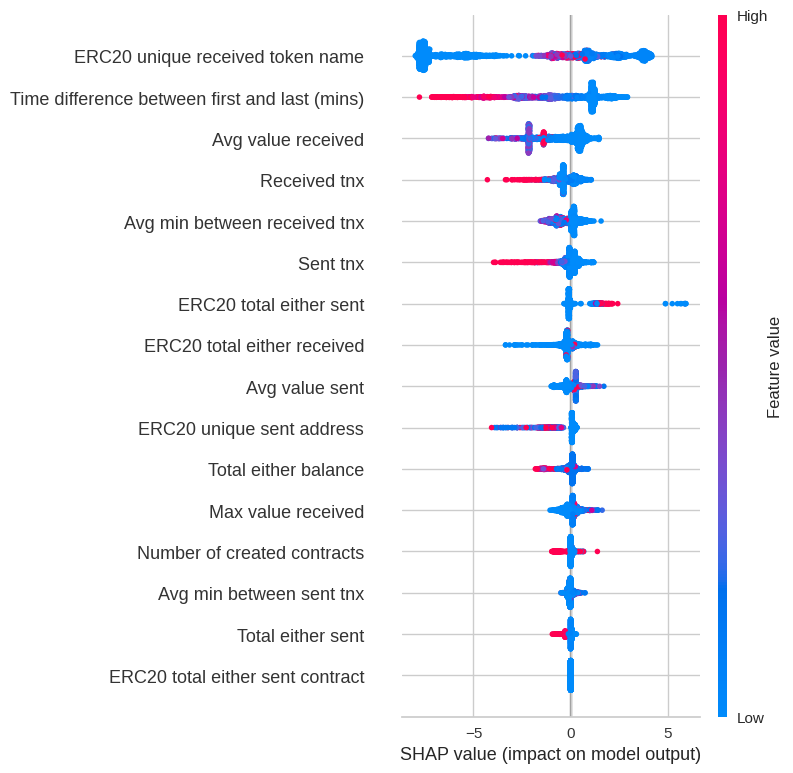

In [ ]:
# interpret model
interpret_model(best_model)

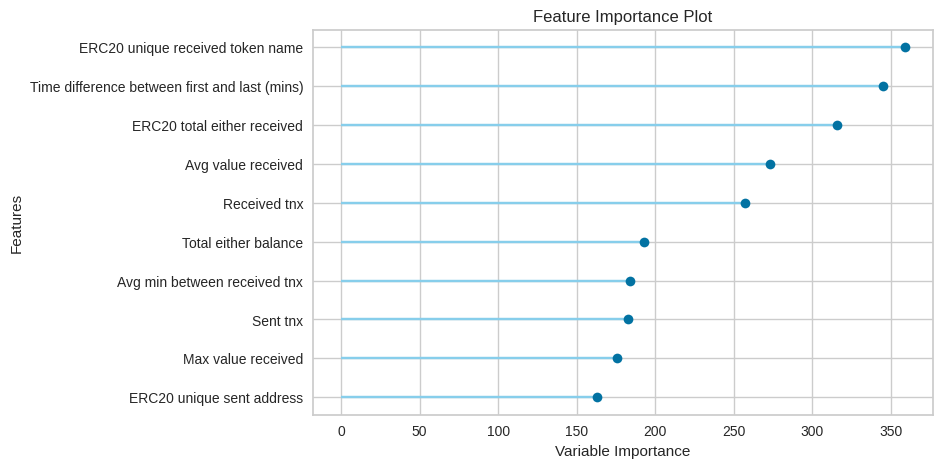

In [ ]:
plot_model(best_model, plot = 'feature')

## Step 8 : Deploy

- **predict model**

In [ ]:
# predict on hold-out
predict_model(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9752,0.9939,0.9426,0.9204,0.9313,0.9162,0.9163


,Avg min between sent tnx,Avg min between received tnx,Time difference between first and last (mins),Sent tnx,Received tnx,Number of created contracts,Max value received,Avg value received,Avg value sent,Total either sent,Total either balance,ERC20 total either received,ERC20 total either sent,ERC20 total either sent contract,ERC20 unique sent address,ERC20 unique received token name,FLAG,prediction_label,prediction_score
874,3.780000,8172.450195,24528.679688,3,3,0,5.000000,2.836766,2.836315,8.508945,0.001354,0.000000e+00,0.000000,0.0,0.0,0.0,0,0,0.9994
3897,0.000000,1416.619995,201160.578125,0,142,1,2.301263,0.774431,0.000000,0.000000,109.969238,2.997803e+00,0.000000,0.0,0.0,2.0,0,0,0.9986
6681,204.820007,72.459999,279917.281250,34,3767,0,5.326195,0.021945,2.430863,82.649330,0.017352,1.786569e-01,0.000000,0.0,0.0,1.0,0,0,0.9546
1537,4.450000,32609.859375,815349.000000,23,25,0,2.994600,0.789535,0.856767,19.705639,0.032736,0.000000e+00,0.000000,0.0,0.0,0.0,0,0,0.9999
300,27805.310547,46509.980469,955991.250000,21,8,0,10.000000,2.663289,1.296190,27.219999,-5.913690,2.971184e+03,2559.591064,0.0,7.0,13.0,0,0,0.9998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,0.000000,0.000000,0.000000,0,1,0,35.000000,35.000000,0.000000,0.000000,35.000000,1.785949e+03,0.000000,0.0,0.0,10.0,0,0,0.7698
496,20434.250000,5467.899902,372128.437500,15,12,0,26.278278,7.346135,2.480738,37.211071,50.942543,6.927305e+04,100.000000,0.0,1.0,22.0,0,0,0.9884
933,0.000000,0.000000,447.950012,1,1,0,10.000000,10.000000,9.999380,9.999380,0.000620,0.000000e+00,0.000000,0.0,0.0,0.0,0,0,0.9994
8281,989.679993,178.470001,5013.330078,2,17,0,6.200000,0.789643,6.710506,13.421012,0.002911,1.000000e-12,0.000000,0.0,0.0,1.0,1,1,0.9997


- **Finalize model**

In [ ]:
# finalize a model
best_model_pipeline = finalize_model(best_model)
best_model_pipeline

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Avg min between sent tnx',
                                             'Avg min between received tnx',
                                             'Time difference between first '
                                             'and last (mins)',
                                             'Sent tnx', 'Received tnx',
                                             'Number of created contracts',
                                             'Max value received',
                                             'Avg value received',
                                             'Avg value sent',
                                             'Total either sent',
                                             'Total either balance',
                                             'ERC20...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=31, objective=None, random_state=123,
                                reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
                                subsample_for_bin=200000, subsample_freq=0))],
         verbose=False)

- **Save model**

In [ ]:
# save pipeline
# model_path = r'C:\Users\Afshin\Desktop\10_Projects\Project_4_Fraud_Detection_Etherium\models\best_model_pycaret_wandb_LGBMClassifier'
model_path = '/content/drive/My Drive/Applied Machine Learning/Project 4 : Fraud Detection Etherium/models/best_model_pycaret_wandb_LGBMClassifier'

save_model(best_model_pipeline, model_path)
print(f"> The best model pipeline Saved to {model_path}")

Transformation Pipeline and Model Successfully Saved
> The best model pipeline Saved to /content/drive/My Drive/Applied Machine Learning/Project 4 : Fraud Detection Etherium/models/best_model_pycaret_wandb_LGBMClassifier


- **Load model**

In [ ]:
# load pipeline
loaded_best_model_pipeline = load_model(model_path)

Transformation Pipeline and Model Successfully Loaded


- **Create app**

In [ ]:
# create app
create_app(loaded_best_model_pipeline)

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://c8947233812de2817e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## Step 9 : Make Predictions

- Find a sample

In [ ]:
sample = df.sample(1)
sample_pred = predict_model(loaded_best_model_pipeline, data= sample)
sample_price_pred = sample_pred[['FLAG', 'prediction_label', 'prediction_score']]
sample_price_pred

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,1.0000,0,0.0000,0.0000,0.0000,nan,0.0000


,FLAG,prediction_label,prediction_score
207,0,0,0.9991
